In [1]:
#### Hello world ####
#### Read Me : ####
#### This MainPY script was made as a final project for my full stack formation ####
#### the main focus was to build a descent ENV (enviroment) for RL (reinforcement learning) ####
#### if you are using it please note that this ENV is not FRAME PERFECT ####
#### your game runs at its speed and the py runs at an completely diferent one ####
#### this makes the chalenge a litle harder and more interesting ####
#### hope you enjoy the code and wish you free of BLUE SCREENS ####

#### ps: if you are runing into BLUE SCREENS stop using the program ####
#### it may harm your HD !!! ####
#### open an virtual machine to prevent that ####

#### this program deals with HID ####
#### HID : human input drivers, its stated at Microsoft site that (dot mess with it because ot can breack your pc inputs) ####

#### pyxinput needs an extension

#### Game_Screen has to be a 10 multiple for rezise to work properly 

#### that being said on to the code : ####

#### Name : MainPY ####
#### file type : .py ####
#### started development : 12/04/2021 dd/mm/aaaa ####
#### main creator : watson1423 ####
#### Program OS Support : windows 10 ####
#### Dependencies :  pyautogui , json , time , cv2 , PIL , asyncio , numpy , keyboard , tensorflow , tf_agents , pyxinput( REQUIRES : ScpVBus ) #### 
LibrariesToImport = {'pyautogui' : 'pyautogui' , 'json' : 'json' , 'time' : 'time' , 'datetime' : 'datetime' , 'cv2' : 'opencv-python' , 'PIL' : 'PIL' , 'asyncio' : 'asyncio' , 'numpy' : 'numpy' , 'keyboard' : 'keyboard' , 'tensorflow' : 'tensorflow' , 'keras' : 'keras', 'tf_agents' : 'tf_agents' , 'pyxinput' : 'pyxinput' , 'msvcrt' : 'msvcrt'}
#### Libraries are used trough this dictionary / dont worry the program auto checks if all the libraryes are available and returns error before it breacks your code ####
LibrariesImported = {}
#### This main READS and USES TEMPLATES on the Templates folder ####
#### the config file can autobuild it self if you got any config errors please just delete it ####

#### Retroarch>settings>video>windowed mode>####
#### windowed scale : 2.0x                  ####
#### show window decorations : on           ####
#### remember window position and size : on ####
#### window width : 640                     ####
#### window height : 480                    ####
################################################

#### Retroarch>settings>video>scaling       ####
#### integer scale : on                     ####
#### aspect ratio : core provider           ####
################################################

#### recomend to have one retroarch instance only for ai usage ####
#### cores tested : sony PlayStation(Beetle PSX HW) , sony PlayStation(PCSX ReARMed) ####

########################################## changes here ############################################

#mode set 0 = Agent auto Train 1 = Read Player save experience 2 = model and agent playgrounds not saving or training  3 experimental stuf and agent creation 
Program_Mode = 1

#the number of vinput players for this game
Vimputs = 4

#the number of human inputs
Himputs = 0

#Libraries Autoinstall togle
AutoPipAlow = True

#game configs
pVars_Sets_Path = "SaveData/GameConf.txt" 

#MainPY Path can leave empt the program auto fils it 
Head_Path = ""

#hook template path
Hook_temp_Path = "Templates/MainAnchor/retroarchlogo.jpg"

#experience json path holder
Experience_Path = "TensorSaves/Experiences/UserExperience/NewPerfectTrain.txt"

#Folder game templates Name
Temps_Folder_Name= "CrashRacing"

#pyview overlay base collor
pyviewcollor = [0,255,0]

#vcombos stored here
vImputCombos = {}

#for seting already presseted screen dzises("Full","HorisontalCut","VerticalCut","DoubleCut") 
Active_Screen_Layout = "DoubleCut"

#if program is in mode 0 or 2 you will need neural models or agents here is the list with the kind and locations of those automaticaly maped for the example one 
Models_Path = [
]

#model maker json path
Model_Maker_Path = "TensorSaves\Agents\ModelsExamples\AgentSample.txt"

#screen scaler 
Screen_Scaler = 5

############################ temporary ##############################################

#####################################################################################

########################################## changes here ############################################

##################################### importing libraryes #####################################

#this libraryes are natively instaled in python and are required for the importing method
import subprocess
import importlib
import sys
import os

def install(package): #install library from string
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def CheckDependecies(LibraryNames):#loop trough all libraries required on dictionary
    if(len(LibraryNames) < 1):
        print("Libraries list shouldn't be empt ")
    autoinstall = False
    #LibraryName = "pandas"
    test = "pd"
    if(AutoPipAlow):
        try:
            import pip
            print("pip present auto install enabled")
            autoinstall = True
        except ImportError:
            print("Warning: Pip not present.")
            print("Auto intall dependencies disabled \n please be shure to have all dependencies installed")
            autoinstall = False
    else:
        print("Warning: Auto install dependencies disabled by user \n please be shure to have all dependencies installed")
    for LibraryName in LibraryNames :
        try:
            LibrariesImported.update({LibraryName:importlib.import_module(LibraryName)})
            print("{} found".format(LibraryName))
        except ImportError:
            print("{} is not instaled".format(LibraryName))
            if(autoinstall):
                print("auto installing {}".format(LibraryName))
                install(LibrariesToImport[LibraryName])
                print("{} instaled sucesfuly".format(LibraryName))
                LibrariesImported.update({LibraryName:importlib.import_module(LibraryName)})
                print("{} found".format(LibraryName))
            else:
                raise Exception("FATAL ERROR: auto install disabled and library missing")
                print("FATAL ERROR: auto install disabled and library missing")
                print("Please install {} before runing or enable auto install".format(LibraryName))
#import method call
CheckDependecies(LibrariesToImport)

################################### end importing libraryes ###################################

########################################## classes ############################################

#Screen Matching templates list 
class Rects:
    #wil be writen on screen
    label = []
    #whidt
    w = []
    #height
    h = []
    #position
    pt = []
    #number of themp iteration
    TemplateHash = []
    #tag to segregate Rects
    tag = []
    def AddRect(self,label,w,h,pt,TemplateHash,tag):
        self.label.append(label)
        self.w.append(w)
        self.h.append(h)
        self.pt.append(pt)
        self.TemplateHash.append(TemplateHash)
        self.tag.append(tag)
    def Clean(self):
        self.label = []
        self.w = []
        self.h = []
        self.pt = []
        self.TemplateHash = []
        self.tag = []
    # clean all with Temphash = x
    def CleanTempHash(self,TemplateHash):
        LastIndex = 0
        loop = True
        IndexesToClean = []
        try:
            IndexesToClean.append(self.TemplateHash.index(TemplateHash))
            LastIndex = self.TemplateHash.index(TemplateHash)
        except:
            return
        while loop :
            try:
                IndexesToClean.append(self.TemplateHash.index(TemplateHash,LastIndex+1))
                LastIndex = self.TemplateHash.index(TemplateHash,LastIndex+1)
            except:
                break
        for index in IndexesToClean[::-1] :
            self.label.pop(index)
            self.w.pop(index)
            self.h.pop(index)
            self.pt.pop(index)
            self.TemplateHash.pop(index)
            self.tag.pop(index)

#player class
class Player :
    #holds list of details of buttons for the player to press and the last pressed list 
    pPress = []
    #virtual controller holder
    pVcontroller = []
    #path for var {} keys
    pVarsKeys = {}
    #an array of arrays to store all nescessary vars for this game ex lap state amo etc
    pVars = []
    # 0 waiting 1 working 2 finished
    pState = []
    #method to add player
    def AddPlayer(self):
        self.pPress.append([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
        VarDict = {}
        for VarK in self.pVarsKeys:
            if( list == type(self.pVarsKeys[VarK]) ):
                VarDict.update({VarK : self.pVarsKeys[VarK].copy() })
            else:
                VarDict.update({VarK : self.pVarsKeys[VarK] })
        self.pVars.append(VarDict)
        self.pState.append(0)
    def __init__(self,pVarsPath):
        self.pPress = []
        with open(pVarsPath) as json_file:
            data = LibrariesImported["json"].load(json_file)
            self.pVarsKeys.update(data['PlayerVars'])
        self.pVars = []
        self.pState = []
    def RestartPlayers(self):
        for playerindex in range(len(self.pPress)) :
            self.pPress[playerindex] = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
            for Varke in self.pVarsKeys:
                if(Varke != "PBestScore"):
                    if( list == type(self.pVarsKeys[Varke]) ):
                        self.pVars[playerindex][Varke] = self.pVarsKeys[Varke].copy()
                    else:
                        self.pVars[playerindex][Varke] = self.pVarsKeys[Varke]
            self.pState[playerindex] = 0
    def MakeVinput(self):
        playerindexdiferential = 1
        if(len(self.pPress) == 3):
            playerindexdiferential = 2
        for playerindex in range(len(self.pPress)) :
            self.pVcontroller.append(LibrariesImported["pyxinput"].vController(playerindex+playerindexdiferential))


#class image templates o track on screen 
class Template : 
    Name = ''
    Tag = []
    PosiblePos = []
    img = []
    def __init__(self,GroupName,SubGroup , imgName , TypeGroup = '' , img = [] ,Tag = [] , PosiblePos = [] ):
        self.Name = imgName 
        self.Tag = []
        if ( TypeGroup == '' ):
            self.Tag.append(SubGroup)
        else :
            self.Tag.append(TypeGroup)
        if(len(Tag) > 0 ):
            for tag in Tag:
                self.Tag.append(tag) 
        self.PosiblePos = PosiblePos
        if(len(img) > 0 ):
            self.img = img
        else :
            if ( TypeGroup == '' ):
                self.img = LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread("Templates/{}/{}/{}.jpg".format(GroupName,SubGroup,imgName)), LibrariesImported["cv2"].COLOR_BGR2GRAY)
            else :
                self.img = LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread("Templates/{}/{}/{}/{}.jpg".format(GroupName,SubGroup,TypeGroup,imgName)), LibrariesImported["cv2"].COLOR_BGR2GRAY)



####################################### end classes ###########################################

######################################### variables ###########################################

#GameName used in experience read
GameName = ""

# Screen Hook
Hook_pos = []

# Screen cordinates
Game_Screen = []

#Game state triguer 0 starting 1 Active(in some of the game tipes like race level etc) 2 loading 3 loading error detecter
Game_State = 0

#variable used mainly to end the training and avoid loading bugs 
GameStateTimeStamp = LibrariesImported["time"].time()

#Templates Categories
Template_Categories = []

#Templates Array [0] categorie[0] etc
Templates = []

#total traning times
Total_Traning_Runs = 0

#Best Score On This Game
PBestScore = 0

#Everage Ai Pontuation
PEverage = 0

#not boosted frame lock
Framelock = 60

#togler variable for colorscreen viewer
pyview = True

#virtual controller togle
Vcontrolleractive = True

#List of rects to pyview
RecList = Rects()

#this hods pontuation system loaded from conf
PontuationSys = []

#holds the neuronal systems may be agents models or anything with specified method type in the method list and respective key
#example [neuronalnetwork,"neuronalname","neuronaltype","playerindexconected","actionType",showresult = False,verssionkeep = 5] 
Neuronal_Holder = []



####################################### end variables #########################################

######################################### constants ###########################################

#an array to be used by a loop to simplify the set button press
pressmark = ['BtnA','BtnB','BtnX','BtnY','BtnShoulderL','BtnThumbL','BtnShoulderR','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','BtnBack','BtnStart']
pressmarkmax = [1,1,1,1,1,255,1,255,32767,32767,32767,32767,15,1,1]
pressmarkmin = [0,0,0,0,0,0,0,0,-32767,-32767,-32767,-32767,0,0,0]

####################################### end constants #########################################

########################################## Methods ############################################

#method to call Templates categories automaticaly wen fedded game folder name 
def LoadTempGroups ( TempsDir ) :
    Groups = os.listdir( Head_Path+"/"+"Templates/" + TempsDir )
    return Groups

#method to return Arrays of names of images and its sub folders
def LoadTempsfromGroup ( GroupsArray ) :
    TempInGroups = []
    tempsubgroup = []
    for Group in GroupsArray:
        tempsubgroup =[]
        i=0
        for ItemInGroupFolder in  os.listdir(Head_Path+"/"+"Templates/CrashRacing/{}".format(Group)):
            if(".jpg" in ItemInGroupFolder):
                tempsubgroup.append(ItemInGroupFolder)
            elif(".txt" in ItemInGroupFolder):
                zerofil = True
            else :
                tempsubgroup.append([ItemInGroupFolder,[]])
                for ItemInSubGroupFolder in os.listdir(Head_Path+"/"+"Templates/CrashRacing/{}/{}".format(Group,ItemInGroupFolder)):
                    if(".jpg" in ItemInSubGroupFolder):
                        tempsubgroup[i][1].append(ItemInSubGroupFolder)
                i += 1
        if(i < 1):
            TempInGroups.append([[Group,tempsubgroup]])
        else:
            for index in range(i):
                TempInGroups.append([Group,tempsubgroup[index]])
    return TempInGroups

#method to return the templates in array
def GetAllTemps(ArrayPath,GamePath):
    template = []
    subgroup = ''
    groupname = GamePath
    imgname = ''
    typename = ''
    tag = []
    posiblepos = []
    for i in range(len(ArrayPath)):
        if(len(ArrayPath) > 1 ):
            subgroup = ArrayPath[i][0]
            for ii in range(len(ArrayPath[i])-1):
                typename =  ArrayPath[i][ii+1][0]
                for iii in range(len(ArrayPath[i][1][1])):
                    imgname = ArrayPath[i][1][1][iii]
                    with open(Head_Path+"/"+'Templates/{}/{}/{}/TemplateJson.txt'.format(groupname,subgroup,typename)) as json_file:
                        data = LibrariesImported["json"].load(json_file)
                        jsondata =  data[imgname[0:-4]] 
                        json_file.close()
                    tempimg = LibrariesImported["numpy"].array(LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread(Head_Path+"/"+'Templates/{}/{}/{}/{}.jpg'.format(groupname,subgroup,typename,imgname[0:-4])), LibrariesImported["cv2"].COLOR_BGR2GRAY))
                    template.append(Template(groupname,subgroup,imgname[0:-4],typename,tempimg,jsondata[0],jsondata[1]))
        else:
            for ii in range(len(ArrayPath[i])):
                subgroup = ArrayPath[i][ii][0]
                for iii in range(len(ArrayPath[i][ii][1])):
                    imgname =  ArrayPath[i][ii][1][iii]
                    jsondata = ''
                    with open(Head_Path+"/"+'Templates/{}/{}/TemplateJson.txt'.format(groupname,subgroup)) as json_file:
                        data = LibrariesImported["json"].load(json_file)
                        jsondata =  data[imgname[0:-4]] 
                        json_file.close()
                    tempimg = LibrariesImported["numpy"].array(LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread(Head_Path+"/"+'Templates/{}/{}/{}/{}.jpg'.format(groupname,subgroup,typename,imgname[0:-4])), LibrariesImported["cv2"].COLOR_BGR2GRAY))
                    template.append(Template(groupname,subgroup,imgname[0:-4],'',tempimg,jsondata[0],jsondata[1]))
    return template

#get screen with x0 x1 y0 y1 or if none is feed it gets full computer screeen returns 2 images  1 grayscale 1 "colorable"
def GetScreen(x0 = 0 , y0 = 0 , x1 = 0 , y1 = 0):
    if((x0 == 0) and (x1 == 0) and (y0 == 0) and (y1 == 0)):
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab()
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    else :
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab(bbox=[x0,y0,x1,y1])
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    return(GrayScreen,ColGrayScreen)

#get screen with Hook pos and screen pos not formated
def Get_Screen_Hooked(Hook_pos , ScreenPos):
    return GetScreen(Hook_pos[0] + ScreenPos[0] , Hook_pos[1] + ScreenPos[1] , Hook_pos[0] + ScreenPos[2] , Hook_pos[1] + ScreenPos[3])

#to fix loaded images that are loaded as int32 but to show corectly should be uint8
def Frame_Color_Fix(imageslist):
    return imageslist.astype(LibrariesImported["numpy"].uint8)

#get Hook Pos
def Get_Hook_pos ():
    #print(Head_Path+"/"+Hook_temp_Path)
    HookTemp = LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread(Head_Path+"/"+Hook_temp_Path), LibrariesImported["cv2"].COLOR_BGR2GRAY)
    GrayScreen,ColGrayScreen = GetScreen()
    w,h = HookTemp.shape[::-1]
    res = LibrariesImported["cv2"].matchTemplate(GrayScreen,HookTemp, LibrariesImported["cv2"].TM_CCOEFF_NORMED)
    treshold = 0.9
    loc = LibrariesImported["numpy"].where(res >= treshold)
    AnchorXY = [0,0]
    for pt in zip(*loc[::-1]) :
        AnchorXY = [pt[0],pt[1]]
    if(AnchorXY == [0,0]) :
        print("ERROR : screen hook not found please highlight the external enviroment or run the same and pres : 0")
    return AnchorXY

#Temporary only for One specifically game
# loved the idea will implement for modularisation of the 4 buttons  
def XimputSerializerUint8(Ximput_Array):
    Serialized = 0
    if(Ximput_Array[12] > 7):
        Ximput_Array[12] = Ximput_Array[12]-8
        Serialized += 8
    if(Ximput_Array[12] > 3):
        Ximput_Array[12] = Ximput_Array[12]-1
        Serialized += 4
    if(Ximput_Array[12] > 1.9):
        Ximput_Array[12] = Ximput_Array[12]-1
        Serialized += 2
    if(Ximput_Array[12] > 0.9):
        Ximput_Array[12] = Ximput_Array[12]-1
        Serialized += 1
    if(Ximput_Array[0] == 1):
        Serialized += 16
    if(Ximput_Array[1] == 1):
        Serialized += 32
    if(Ximput_Array[5] == 1):
        Serialized += 64
    if(Ximput_Array[7] == 1):
        Serialized += 128
    return Serialized

#temporary test
def XimputSerializerUint83(Ximput_Array):
    Ximput_Array = Ximput_Array.copy()
    Serialized = 0
    side = 0
    if(Ximput_Array[12] > 7):
        Ximput_Array[12] = Ximput_Array[12]-8
        side = 2
    if(Ximput_Array[12] > 3):
        Ximput_Array[12] = Ximput_Array[12]-1
        side = 1
    if((Ximput_Array[0] == 1) and (side == 0)) :
        Serialized = 0
    elif((Ximput_Array[0] == 1) and (side == 1)) :
        Serialized == 1
    elif((Ximput_Array[0] == 1) and (side == 2)) :
        Serialized == 2
    else:
        Serialized = float(int(LibrariesImported["numpy"].random.rand() *2.5))
    return Serialized

#worked quite well for 3 choises char 
def Uint8Ximputter3(Uint8Input):
    Ximput_Array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    Uint8Input = int(Uint8Input%3)
    if(Uint8Input == 0):
        Ximput_Array = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    if(Uint8Input == 1):
        Ximput_Array = [1,0,0,0,0,0,0,0,0,0,0,0,4,0,0]
    if(Uint8Input == 2):
        Ximput_Array = [1,0,0,0,0,0,0,0,0,0,0,0,8,0,0]
    return Ximput_Array

#as said above this is a lovely method for modularisation furter work required
def Uint8Ximputter(Uint8Input):
    Ximput_Array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    if(Uint8Input > 127):
        Uint8Input = Uint8Input-128
        Ximput_Array[7] = 1 
    if(Uint8Input > 63):
        Uint8Input = Uint8Input-64
        Ximput_Array[5] = 1
    if(Uint8Input > 31):
        Uint8Input = Uint8Input-32
        Ximput_Array[1] = 1
    if(Uint8Input > 15):
        Uint8Input = Uint8Input-16
        Ximput_Array[0] = 1
    if(Uint8Input > 7):
        Uint8Input = Uint8Input-8
        Ximput_Array[12] += 8
    if(Uint8Input > 3):
        Uint8Input = Uint8Input-4
        Ximput_Array[12] += 4
    if(Uint8Input > 1.9):
        Uint8Input = Uint8Input-2
        Ximput_Array[12] += 2
    if(Uint8Input > 0.9):
        Uint8Input = Uint8Input-1
        Ximput_Array[12] += 1
    return Ximput_Array

#avoids impossiblenumbers
def array15norm(array15):
    Ximput_Array = array15.copy()
    for arrayindex in range(len(pressmarkmax)):
        Ximput_Array[arrayindex] = ((round(Ximput_Array[arrayindex])) % (pressmarkmax[arrayindex] + 1))
    return Ximput_Array

#Reads Real controller ximput and tranforms into xinray
def ReadXimp(GamepadIndex) :
    MyRead = LibrariesImported["pyxinput"].rController(GamepadIndex)
    readmark = ['A','B','X','Y','LEFT_SHOULDER','BtnThumbL','RIGHT_SHOULDER','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','BACK','START']
    ppressed = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for press in MyRead.buttons:
        i=0
        if((press == 'DPAD_UP') or (press == 'DPAD_LEFT') or (press == 'DPAD_DOWN') or (press == 'DPAD_RIGHT')):
            if(press == 'DPAD_UP'):
                ppressed[12]+=1
            if(press == 'DPAD_LEFT'):
                ppressed[12]+=4
            if(press == 'DPAD_DOWN'):
                ppressed[12]+=2
            if(press == 'DPAD_RIGHT'):
                ppressed[12]+=8
        for readpress in readmark:
            if(press ==  readpress):
                ppressed[i] = 1
            i+=1
    return ppressed
#clear controller releasses all buttons and deactivates
def ResetVControllers():
    for playerindex in range(len(players.pPress)) :
        players.pPress[playerindex] = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    for virtualcontrollerindex in range(len(players.pVcontroller)):
        for Bpress in range(len(pressmark)):
            players.pVcontroller[virtualcontrollerindex].set_value(pressmark[Bpress],0)

#Sequence to restart the Race
def RaceRestartSequence(Total_Traning_Runs, auto = False):
    if(auto == True):
        print("Time Up Restarting {}".format(Total_Traning_Runs))
    else :
        print('control key pressed! : 9')
        print('race restart')
    Game_State = 2
    players.RestartPlayers()
    TemplateFocus = 0
    TempIterator = 0
    #Total_Traning_Runs += 1
    RecList.Clean()
    LibrariesImported["time"].sleep(0.2)
    ResetVControllers()
    LibrariesImported["time"].sleep(0.2)
    GameStateTimeStamp = LibrariesImported["time"].time()
    vImputComboPress("RaceRestartCombo")

#Sequence to restart the External Enviroment
def RestartExternalEnviroment(Game_State,Hook_pos,auto = False):
    if (auto):
        print("Emulator restarting") 
    else :
        print('control key pressed! : h')
        print('Emulator is being restarted please stand by')
    LibrariesImported["pyautogui"].click(Hook_pos[0] + 75,Hook_pos[1] + 30)
    LibrariesImported["pyautogui"].click(Hook_pos[0] + 75,Hook_pos[1] + 120)
    Game_State = 0
    players.RestartPlayers()
    LibrariesImported["time"].sleep(0.1)
    ResetVControllers()
    LibrariesImported["time"].sleep(0.1)
    GameStateTimeStamp = LibrariesImported["time"].time()
    TemplateFocus = 0
    TempIterator = 0
    RecList.Clean()
    return Game_State

#Start sequence for when main menu template is recognized
def StartMenuSequence():
    Game_State = 2
    GameStateTimeStamp = LibrariesImported["time"].time()
    LibrariesImported["time"].sleep(0.1)
    ResetVControllers()
    LibrariesImported["time"].sleep(0.1)
    vImputComboPress("StartMenuSequence")

#Virtual Imput Combo Loop Method
def vImputComboPress(ComboStr):
    for ComboStep in vImputCombos[ComboStr]:
        if(ComboStep[0] == "press"):
            players.pVcontroller[ComboStep[1]].set_value(pressmark[ComboStep[2]],ComboStep[3])
            LibrariesImported["time"].sleep(ComboStep[4])
            players.pVcontroller[ComboStep[1]].set_value(pressmark[ComboStep[2]],0)
            LibrariesImported["time"].sleep(ComboStep[4])

#pyview togle change
def ActivateView(pyviewa):
    if(pyviewa):
        pyviewa = False
        LibrariesImported["cv2"].destroyAllWindows()
    else:
        pyviewa = True
    return pyviewa

#method to show variables on image with draw type arraypos array vars sometimes collor ser and max decimal set ps arraytipe can be any typoe but vars need to be as long as the product 
def pyviewdraw(imagetodraw,drawtype,arraypos,arrayvalues,MaxDecimals = 1,pyviewcollor = [0,255,0]):
    if(drawtype == 'p4_sump:'):
        sumed = 0
        player = 0
        for y in range(len(arraypos[0])):
            for x in range(len(arraypos[1])):
                for item in arrayvalues[player] :
                    sumed += item
                imagetodraw = LibrariesImported["cv2"].putText(imagetodraw, "P:{V:.{T}f}".format(V = sumed,T = MaxDecimals) , (arraypos[0][x],arraypos[1][y])  ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,pyviewcollor,2)
                sumed = 0
                player += 1
        return imagetodraw
    if(drawtype == 'p4_sum%'):
        sumed = 0
        player = 0
        for y in range(len(arraypos[0])):
            for x in range(len(arraypos[1])):
                for item in arrayvalues[player] :
                    sumed += item
                imagetodraw = LibrariesImported["cv2"].putText(imagetodraw, "{V:.{T}f}%".format(V = sumed,T = MaxDecimals) , (arraypos[0][x],arraypos[1][y])  ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,pyviewcollor,2)
                sumed = 0
                player += 1
        return imagetodraw
    if(drawtype == 'p4_trbl'):
        sumed = 0
        player = 0
        for y in arraypos[1] :
            for x in arraypos[0] :
                imagetodraw  = LibrariesImported["cv2"].rectangle(imagetodraw , (x[0],y[0]), (x[1],y[1]), arrayvalues[player],-1)
                player += 1
        return imagetodraw

#draws the variables alimented on the screen  ********************* needs to be fixed before end verssion  fix is to make the variables alimented be readable from  json 
def playervar_pyvewinject(newscreen):
    for index in range(len(pyviewscreenanchor)):
        varlist = []
        for plyervar in players.pVars:
            if (list == type(plyervar[list(pyviewindextype.keys())[index]])):
                varlist.append(plyervar[list(pyviewindextype.keys())[index]])
            else:
                varlist.append([plyervar[list(pyviewindextype.keys())[index]]])
        newscreen = pyviewdraw(newscreen,list(pyviewindextype.values())[index],pyviewscreenanchor[index], varlist ,1,[0,255,0])
    return newscreen

#cuts screen in 4
def screen4divide(grayscreena):
    croped_images = []
    x = int(grayscreena.shape[0]/2)
    y = int(grayscreena.shape[1]/2)
    for xint in range(2):
        for yint in range(2):
            croped_images.append(grayscreena[x*xint:x*(xint+1), y*yint:y*(yint+1)])
    return croped_images

#ads templates matching templat and that are in possinle pos of templat class or forced to the rects
def CompareTemplateToScreen(image,templat,index,possiblepos = [] ):
    if(possiblepos == []):
        possiblepos = templat.PosiblePos
    RecList.CleanTempHash(index)
    w,h = templat.img.shape[::-1]
    res = LibrariesImported["cv2"].matchTemplate(image,templat.img, LibrariesImported["cv2"].TM_CCOEFF_NORMED)
    treshold = 0.88
    loc = LibrariesImported["numpy"].where(res >= treshold)
    for pt in zip(*loc[::-1]) :
        if(possiblepos == []):
            RecList.AddRect(templat.Name,w,h,pt,index,templat.Tag)
        else:
            if(possiblepos[0] == 'rangey'):
                if((possiblepos[1][0] < pt[1]) and (pt[1] <possiblepos[1][1])):
                    RecList.AddRect(templat.Name,w,h,pt,index,templat.Tag)
            elif(possiblepos[0] == 'rangex'):
                if((possiblepos[1][0] < pt[0]) and (pt[0] <possiblepos[1][1])):
                    RecList.AddRect(templat.Name,w,h,pt,index,templat.Tag)
            else:
                for pos in possiblepos:
                    if((pos[0] == pt[0]) and (pos[1] == pt[1])):
                        RecList.AddRect(templat.Name,w,h,pt,index,templat.Tag)

#draw Rects to pyimage
def pyrectsdraw(rects,colgrayscreen):
    for reci in range(len(RecList.label)):
        colgrayscreen = LibrariesImported["cv2"].rectangle(colgrayscreen,RecList.pt[reci],(RecList.pt[reci][0]+RecList.w[reci],RecList.pt[reci][1]+RecList.h[reci]),(0,255,0),1)
        colgrayscreen = LibrariesImported["cv2"].putText(colgrayscreen, RecList.label[reci] ,(RecList.pt[reci][0],RecList.pt[reci][1]-10),LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,1,(0,255,0),1)
    return colgrayscreen

#method to actualize show pyview
def pyshow(colgrayscreen):
    LibrariesImported["cv2"].imshow('pyview',colgrayscreen)
    LibrariesImported["cv2"].waitKey(1)

#testcheck
def agentshow(agentview):
    LibrariesImported["cv2"].imshow('agentview',agentview)
    LibrariesImported["cv2"].waitKey(1)

#the method where all pontuation system is used to actualy generate the pontuations : quite big
def Pontuate(PontuationSys):#a simple method for comparing template names and adding respective variables for a screen divided in 4 slices [variable name to assign value, if 0 or positive it is the index for the pPontuation , list of [ points  of this template , name template , value to set to variable]]
    for PontuationMethod in PontuationSys:
        if(PontuationMethod[0] == "SetScoreWithSprite4pareascreen"):
            for Recs in range(len(RecList.tag)):
                if(RecList.tag[Recs][1] == PontuationMethod[1][0][0]):
                    for PontuationLabelindex in range(len(PontuationMethod[1][1])):
                        if(RecList.label[Recs] == PontuationMethod[1][1][PontuationLabelindex][1]):
                            xmidle = dzise[0]*Screen_Scaler
                            ymidle = dzise[1]*Screen_Scaler
                            pIndex = 0
                            if(RecList.pt[Recs][0] < xmidle):
                                if(RecList.pt[Recs][1] < ymidle):
                                    pIndex = 0
                                else:
                                    pIndex = 2
                            else:
                                if(RecList.pt[Recs][1] < ymidle):
                                    pIndex = 1
                                else:
                                    pIndex = 3
                            if((PontuationMethod[1][0][1] > -1 ) and (players.pState[pIndex] == 1)):
                                if(players.pVars[pIndex]["pPoints"][PontuationMethod[1][0][1]] != PontuationMethod[1][1][PontuationLabelindex][0]):
                                    players.pVars[pIndex]["pPoints"][PontuationMethod[1][0][1]] = PontuationMethod[1][1][PontuationLabelindex][0]
                            if(players.pVars[pIndex][PontuationMethod[1][0][0]] != PontuationMethod[1][1][PontuationLabelindex][2]):
                                players.pVars[pIndex][PontuationMethod[1][0][0]] = PontuationMethod[1][1][PontuationLabelindex][2]
        if(PontuationMethod[0] == "Finished4pareascreen"):#a special kind for recognizing and simbolic endgame template for only one completition tipe template this method is not usable for negative and positive only one of they its also for 4 player screen separation tipe
            for Recs in range(len(RecList.tag)):
                if(RecList.tag[Recs][1] == PontuationMethod[1][0]):
                    xmidle = dzise[0]*Screen_Scaler
                    ymidle = dzise[1]*Screen_Scaler
                    pIndex = 0
                    if(RecList.pt[Recs][0] < xmidle):
                        if(RecList.pt[Recs][1] < ymidle):
                            pIndex = 0
                        else:
                            pIndex = 2
                    else:
                        if(RecList.pt[Recs][1] < ymidle):
                            pIndex = 1
                        else:
                            pIndex = 3
                    if(players.pState[pIndex] == 1):
                        if(PontuationMethod[1][1] > -1 ):
                            if(Program_Mode == 1):
                                print("player:",pIndex,"has finished the race press [ to save and restart or - to just restart")
                            players.pVars[pIndex]["pPoints"][PontuationMethod[1][1]] += PontuationMethod[1][2]
                        players.pState[pIndex] = 2
        if(PontuationMethod[0] == "ProgressX100"):#took of oclusion          ONLY use if the case is perfect matching [percentage save , last percentage for shure ,neighbor unique int key, variable if they are in the same ex(lap) , multiply modifier, minx , maxx , pPoints index for this pontuation ]
            Total = len(PontuationMethod[1][1])
            Done = []
            newpos = []
            SeenThisFrame = []
            for ind in range(len(PontuationMethod[1][1])):
                if(players.pState[ind] == 1):
                    Done.append(0)
                else:
                    Done.append(2)
                newpos.append(PontuationMethod[1][0][5])
            for Recs in range(len(RecList.tag)):
                if(RecList.tag[Recs][1] == PontuationMethod[1][0][0]):
                    for pNameTemp in PontuationMethod[1][1]:
                        if(RecList.label[Recs] == pNameTemp[1]):
                            pIndex = pNameTemp[0]
                            if(Done[pIndex] == 0):
                                newpos[pIndex] = RecList.pt[Recs][0]
                                players.pVars[pIndex][PontuationMethod[1][0][1]] = newpos[pIndex]
                                Done[pIndex] = 1
            for pIndexer in range(len(Done)):
                if(Done[pIndexer] == 0):
                    newpos[pIndexer] = players.pVars[pIndexer][PontuationMethod[1][0][1]]
            for newpoindex in range(len(newpos)):
                if( newpos[newpoindex] < PontuationMethod[1][0][5] ) :
                    newpos[newpoindex] = PontuationMethod[1][0][5]
                elif( newpos[newpoindex] > PontuationMethod[1][0][6] ) :
                    newpos[newpoindex] = PontuationMethod[1][0][6]
                # (maximun - minimun) / 100  = 1%
                players.pVars[newpoindex][PontuationMethod[1][0][0]] = ((newpos[newpoindex] - PontuationMethod[1][0][5])/((PontuationMethod[1][0][6] - PontuationMethod[1][0][5])/ 100))
                players.pVars[newpoindex]["pPoints"][PontuationMethod[1][0][7]] = players.pVars[newpoindex]["pLapPercentage"] * PontuationMethod[1][0][4]

#experiences saver 
def Save_Experience(PlayerIndex,GameName,Experience_Path = Experience_Path):
    data={}
    if(os.path.exists(Head_Path+"/"+Experience_Path)):
        with open(Head_Path+"/"+Experience_Path) as json_file:
            data = LibrariesImported["json"].load(json_file)
            print("experience size is ", (len(data[GameName]["action"]) + 1))
            json_file.close()
    else:
        data = {"Crash": {"action": [], "reward": [], "observation": []}}
    data[GameName]["action"].append(players.pVars[PlayerIndex]["pActions"])
    data[GameName]["reward"].append(players.pVars[PlayerIndex]["pRewards"])
    data[GameName]["observation"].append(players.pVars[PlayerIndex]["pObservation"]) 
    with open(Head_Path+"/"+Experience_Path, 'w') as outfile:
        LibrariesImported["json"].dump(data, outfile, indent=4)
        outfile.close()

#simply clean a list with multiple kinds of vars 
def listchangerfloat(Listtoclean):
    cleanedlist = Listtoclean
    sumi = 0
    for listitem in range(len(cleanedlist)):
        cleanedlist[listitem]=float(cleanedlist[listitem])
        sumi += float(cleanedlist[listitem])
    return  sumi

#returns median of a list
def listmediam(Listtoclean):
    cleanedlist = Listtoclean
    sumi = 0
    for listitem in range(len(cleanedlist)):
        cleanedlist[listitem]=float(listitem)
        sumi += float(listitem)
    return  (sumi/len(cleanedlist))

#inputs the pPress off all players containing pVcontrollers pPress[0] inputed and pPress[1] is the comparer to see if imput changed is atualized 
def vinputter():
    for playerindes in range(len(players.pVcontroller)):
        if(True):
            for buttonindex in range(len(pressmark)-1):
                players.pVcontroller[playerindes].set_value(pressmark[buttonindex],players.pPress[playerindes][0][buttonindex])
        players.pPress[playerindes][1] = players.pPress[playerindes][0].copy()

#recives inputs and sets the pPress in array converted mode 
def setpPress(playerindex,imput,actiontype):
    xinparray = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    if(actiontype == "Serialized3"):
        xinparray = Uint8Ximputter3(int(imput))
    if(actiontype == "Serialized8"):
        xinparray = Uint8Ximputter(int(imput))
    if(actiontype == "15arrayones"):
        if((len(imput)>11 ) and (len(imput) < 16 )):
            for imputindex in range(len(pressmark)-1):
                #not Tested
                xinparray[imputindex] = (imput*pressmarkmax[imputindex])-(pressmarkmin[imputindex]/2) 
    if(actiontype == "15array"):
        xinparray = array15norm(imput[0])
    players.pPress[playerindex][0] = xinparray.copy()

#this method is a sample it needs to be upgraded to read all kinds of layers  it is caled to generate keras neural model networks "suposibly will be easyer for HUMANS to make neural models " 
def NeuronalMaker(NeuronalList):
    if(NeuronalList[0] == "Conv2dModel"):
        model = LibrariesImported["keras"].models.Sequential()
        for layer in range(len(NeuronalList[1])):
            if(NeuronalList[1][layer][0] == "input" ):# wille typing input layer can use preset keyword for actions or the dsize desired
                Resizedsize = NeuronalList[1][layer][1]
                if(NeuronalList[1][layer][1] == "Curentgraydzize" ):
                    #just ading [] on the gray numbers
                    dims = [] 
                    for x in range(dzise[0]):
                        dims.append([])
                        for y in range(dzise[1]):
                            dims[x].append([1])
                    Resizedsize = LibrariesImported["numpy"].array(dims).shape
                model.add( LibrariesImported["keras"].layers.InputLayer(input_shape=Resizedsize))
            if(NeuronalList[1][layer][0] == "conv2din" ):
                model.add(LibrariesImported["keras"].layers.Conv2D(filters=NeuronalList[1][layer][1], kernel_size=NeuronalList[1][layer][2],padding=NeuronalList[1][layer][3], activation=NeuronalList[1][layer][4], input_shape=NeuronalList[1][layer][5]))
            if(NeuronalList[1][layer][0] == "conv2d" ):
                model.add(LibrariesImported["keras"].layers.Conv2D(filters=NeuronalList[1][layer][1], kernel_size=NeuronalList[1][layer][2],padding=NeuronalList[1][layer][3], activation=NeuronalList[1][layer][4]))
            if(NeuronalList[1][layer][0] == "maxpool2d"):
                model.add(LibrariesImported["keras"].layers.MaxPool2D(pool_size=NeuronalList[1][layer][1], strides=NeuronalList[1][layer][2], padding=NeuronalList[1][layer][3]))
            if(NeuronalList[1][layer][0] == "dense"):
                model.add(LibrariesImported["keras"].layers.Dense(units=NeuronalList[1][layer][1], activation=NeuronalList[1][layer][2]))
            if(NeuronalList[1][layer][0] == "flatten"):
                model.add(LibrariesImported["keras"].layers.Flatten())

        return model

#creates the optmizer   probably will be optmized to work with optmizer json
def KerasOptmizerBuilder(optmizerlist):
    if(optmizerlist[1] == "Adam"):
        return LibrariesImported["keras"].optimizers.Adam(learning_rate=optmizerlist[2], beta_1=optmizerlist[3], beta_2=optmizerlist[4], epsilon=optmizerlist[5], amsgrad=optmizerlist[6])
    if(optmizerlist[1] == "Adamax"):
        return LibrariesImported["keras"].optimizers.Adamax(learning_rate=optmizerlist[2], beta_1=optmizerlist[3], beta_2=optmizerlist[4], amsgrad=optmizerlist[6])

#method to create keras optimizer andf compile a keras model
def KerasModelCompile(Extraslist,indexonlist):
    optmizer = 0
    for extra in range(len(Extraslist)):
        if(Extraslist[extra][0] == "optimizer"):
            print("optmized")
            optimizer = KerasOptmizerBuilder(Extraslist[extra])
        if(Extraslist[extra][0] == "compile"):
            print("Compiled")
            Neuronal_Holder[indexonlist][0].compile(optimizer= optimizer,loss=Extraslist[extra][1],metrics=Extraslist[extra][2])

#module to save with index 
def SaveKerasModelVersion(index):
    if(os.path.exists("TensorSaves/Agents/BestScores/"+GameName)):
        Neuronal_Holder[index][0].save('TensorSaves/KerasModels/'+ Neuronal_Holder[index][1]+'/' + str(len(os.listdir('TensorSaves/KerasModels/'+ Neuronal_Holder[index][1]))))
    else:
        Neuronal_Holder[index][0].save('TensorSaves/KerasModels/'+ Neuronal_Holder[index][1]+'/' + '0' )

#returns labels and images from a file after passing them from a reinforce filter only the ones that decreaces score loss and that increasses score are read 
def experiencemaker(experiencepath,actiontipe,observationdims = 0): 
    with open(Head_Path+"/"+experiencepath) as json_file:
        data =  LibrariesImported["json"].load(json_file)
        json_file.close()
    filteredlabels = []
    filteredimages = []
    for trainindex in range(len(data[GameName]["reward"])):
        lastreward = 0
        deltareward = 0
        lastdeltareward = 0
        for frameindex in  range(len(data[GameName]["reward"][trainindex])):
            deltareward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) - lastdeltareward
            if(( lastdeltareward * 0.8  < deltareward ) or (deltareward < lastdeltareward * 2 )):
                if(actiontipe == "Serialized8"):
                    filteredlabels.append( XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex]))
                if(actiontipe == "Serialized83"):
                    filteredlabels.append( XimputSerializerUint83(data[GameName]["action"][trainindex][frameindex]))
                elif(actiontipe == "15array"):
                    filteredlabels.append(data[GameName]["action"][trainindex][frameindex])
                if(observationdims == 0):
                    filteredimages.append(data[GameName]["observation"][trainindex][frameindex])
                elif(observationdims == -1):
                    filteredimages.append( LibrariesImported["numpy"].expand_dims(data[GameName]["observation"][trainindex][frameindex], axis=-1))
            lastreward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex])
            lastdeltareward = deltareward
    filteredimages = LibrariesImported["numpy"].array(filteredimages)
    filteredlabels = LibrariesImported["numpy"].array(filteredlabels)
    print(filteredimages.shape)
    print(filteredlabels.shape)
    return filteredlabels,filteredimages

#new experimentarfilter to read in relation of PBestScore    
def experiencemaker2(experiencepath,actiontipe,printindex = -1 ,observationdims = 0):
    filteredlabels = []
    filteredimages = []
    rewardstepdist = 15
    Reference = [0,2000]
    movingdeltareward =  Reference[0]
    i = 0
    while(i<listchangerfloat(Reference)):
         i += 1
         if(Reference[1] > (1000 * i)):
             movingdeltareward += 100
    ReferenceDelta = movingdeltareward / 800
    with open(Head_Path+"/"+experiencepath) as json_file:
        data =  LibrariesImported["json"].load(json_file)
        json_file.close()
    for trainindex in range(len(data[GameName]["reward"])):
        lastreward = 0
        lastrewardstep = 0
        deltareward = 0
        lastdeltareward = 0
        for frameindex in  range(len(data[GameName]["reward"][trainindex])):
            if(True):
            #data[GameName]["reward"][trainindex][frameindex][0] > 20 or data[GameName]["reward"][trainindex][frameindex][1] > 10
                if(frameindex + rewardstepdist < len(data[GameName]["reward"][trainindex])):
                    deltastep = (data[GameName]["reward"][trainindex][frameindex+rewardstepdist][0] - data[GameName]["reward"][trainindex][frameindex][0]) 
                    Nonul = True
                    for stepframes in range(rewardstepdist):
                        deltastap = (data[GameName]["reward"][trainindex][frameindex + stepframes + 1][0] - data[GameName]["reward"][trainindex][frameindex + stepframes][0])
                        if(deltastap <= 0.1):
                            Nonul = False 
                    #if(False):
                    if((deltastep > (ReferenceDelta*rewardstepdist) * 1.5) and ( Nonul )):
                        if(actiontipe == "Serialized8"):
                            for stepframes in range(round(1)):
                                filteredlabels.append( XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex]))
                        if(actiontipe == "Serialized83"):
                            for stepframes in range(round(1)):
                                filteredlabels.append( XimputSerializerUint83(data[GameName]["action"][trainindex][frameindex]))
                        elif(actiontipe == "15array"):
                            for stepframes in range(round(1)):
                                filteredlabels.append(data[GameName]["action"][trainindex][frameindex])
                        if(observationdims == 0):
                            for stepframes in range(round(1)):
                                filteredimages.append(data[GameName]["observation"][trainindex][frameindex])
                        elif(observationdims == -1):
                            for stepframes in range(round(1)):
                                filteredimages.append( LibrariesImported["numpy"].expand_dims(data[GameName]["observation"][trainindex][frameindex], axis=-1))
                        if(printindex == len(filteredimages)):
                            print(trainindex , frameindex)
                    
    filteredimages = LibrariesImported["numpy"].array(filteredimages)
    filteredimages = Frame_Color_Fix(filteredimages)
    filteredlabels = LibrariesImported["numpy"].array(filteredlabels)
    print(filteredimages.shape)
    print(filteredlabels.shape)
    return filteredlabels,filteredimages

#method to train the keras model not finished
def KerasTrainer(index,filteredlabels,filteredimages,filteredimagespseudobatch = False ,traintestsplit = 0,epochs = 1):
    if(traintestsplit != 0):
        #splits the data
        zerofil=True
    else:
        if(filteredimagespseudobatch):
            train_images = LibrariesImported["numpy"].expand_dims(filteredimages , axis=0)
            test_images = LibrariesImported["numpy"].expand_dims(filteredimages , axis=0)
        else:
            train_images = filteredimages
            test_images = filteredimages
        test_labels = filteredlabels
        train_labels = filteredlabels
    print(train_labels.shape)
    history = Neuronal_Holder[index][0].fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    #test_image = test_image[0]
    #test_prediction = Neuronal_Holder[index][0].predict(test_image)
    print("train completed for Neuronal ", index ," example prediction " )
    return history

#calls proper method for defined neural model
def NeuralAct(index,observation,modeltype):
    action = 0
    if(modeltype == "keras"):
        action = Neuronal_Holder[index][0].predict(observation)
    return action

#to prevent frame overteping and try to maintain syncronisation smooth just input the frames per second desired and call it everry loop
def Framelock(Framelock):
    clock = LibrariesImported["time"].perf_counter() * Framelock  #  measer time in 1/60 seconds
    sleep = int(clock) + 1 - clock  #  time till the next 1/60 
    LibrariesImported["time"].sleep(sleep/Framelock)

#controlls timeflags like reset game or check enviroment desync
def TimeCheck( Game_State, GameStateTimeStamp , PBestScore , ColGrayScreen,Total_Traning_Runs):
    if (( Game_State == 3 ) and (  LibrariesImported["time"].time() - GameStateTimeStamp > 30 )) :
        print("loading error detected restarting emulator")
        Game_State = RestartExternalEnviroment(Game_State,Hook_pos,True)
    if (( Game_State == 2 ) and (  LibrariesImported["time"].time() - GameStateTimeStamp > 30 )) :  
        print("please check if there is any erro during load emulator restart in a minut ")
        Game_State = 3
        GameStateTimeStamp =  LibrariesImported["time"].time()
    if (( Game_State == 1 ) and (  LibrariesImported["time"].time() - GameStateTimeStamp > 210 )) :
        
        #analize and save race results 
        Total_Traning_Runs = RestartSaver(Total_Traning_Runs,GameName,PBestScore,ColGrayScreen,True)

        print("worked")
        Game_State = 2
        GameStateTimeStamp = LibrariesImported["time"].time()
        RaceRestartSequence(Total_Traning_Runs,True)
    return Game_State,GameStateTimeStamp,Total_Traning_Runs

#checks and sets stress and ragemode with given paramethers  "parameters to be implemented "
def RageCharge():
    for playerindes in range(len(players.pVcontroller)):
        players.pVars[playerindes]["pPointProgressMean"] = listchangerfloat(players.pVars[playerindes]["pPoints"]) / (len(players.pVars[playerindes]["pRewards"]) + 0.001)
        if(players.pVars[playerindes]["pRage"]):
            if( listchangerfloat(players.pVars[playerindes]["pPoints"]) -  listchangerfloat(players.pVars[playerindes]["pPointsLasts"]) <= players.pVars[playerindes]["pPointProgressMean"] ):
                players.pVars[playerindes]["pStress"] -= 10
            if(players.pVars[playerindes]["pStress"] < 0):
                players.pVars[playerindes]["pRage"] = False
                players.pVars[playerindes]["pColorSignal"] = [0,0,0]
        else:
            if( listchangerfloat(players.pVars[playerindes]["pPoints"]) -  listchangerfloat(players.pVars[playerindes]["pPointsLasts"]) <= players.pVars[playerindes]["pPointProgressMean"] ):
                players.pVars[playerindes]["pStress"] += 2
            else:
                players.pVars[playerindes]["pStress"] -= 1
            if(players.pVars[playerindes]["pStress"] / 10 > LibrariesImported["numpy"].random.rand() * 1000):
                players.pVars[playerindes]["pRage"] = True
                players.pVars[playerindes]["pColorSignal"] = [0,0,255]
        players.pVars[playerindes]["pPointsLasts"] = players.pVars[playerindes]["pPoints"]  

#Rage Aplyer with keyword
def RageAply():
    for playerindes in range(len(players.pVcontroller)):
        if(players.pVars[playerindes]["pRage"]):
            if(players.pVars[playerindes]["pStressMode"] == "acelrand"):
                for buttonindex in range(len(players.pPress[playerindes][0])-1) :
                    if( buttonindex == 0 ):
                        players.pPress[playerindes][0][buttonindex] = 1
                    if(( buttonindex == 1 ) or ( buttonindex == 2 ) or ( buttonindex == 3 ) or ( buttonindex == 4 ) or ( buttonindex == 6 ) or ( buttonindex == 13 )) :
                        players.pPress[playerindes][0][buttonindex] = round(LibrariesImported["numpy"].random.rand())
                    if( buttonindex == 12) :
                        players.pPress[playerindes][0][buttonindex] = (round(LibrariesImported["numpy"].random.rand()) + 1 ) * 4

#saver before restart
def RestartSaver(Total_Traning_Runs , GameName , PBestScore , ColGrayScreen , Train = False):
    ResetVControllers()
    StopScreen = ColGrayScreen
    LibrariesImported["cv2"].putText(StopScreen,"Saving" ,  ((dzise[0]*Screen_Scaler) - 120 ,dzise[1]*Screen_Scaler)  ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,4,[255,0,0],2)
    pyshow(ColGrayScreen)
    Pass_Saved = False
    for playerindes in range(len(players.pVcontroller)):
            if(listchangerfloat(players.pVars[playerindes]["pPoints"]) > 50):
                Pass_Saved = True
                if(listchangerfloat(players.pVars[playerindes]["pPoints"]) > listchangerfloat(PBestScore)):
                    print("New High Score")
                    if(os.path.exists("TensorSaves/Agents/BestScores/"+GameName+"/BestScoreAgent")):
                        Neuronal_Holder[playerindes][0].save("TensorSaves/Agents/BestScores/"+GameName+"/BestScoreAgent"+str(len(os.listdir("TensorSaves/Agents/BestScores/"+GameName+"/BestScoreAgent"))))
                    else:
                        Neuronal_Holder[playerindes][0].save("TensorSaves/Agents/BestScores/"+GameName+"/BestScoreAgent0")
                    with open(Head_Path+"/"+pVars_Sets_Path) as json_file:
                        data = LibrariesImported["json"].load(json_file)
                        data["PlayerReference"]["PBestScore"] = players.pVars[playerindes]["pPoints"]
                        json_file.close()
                    PBestScore = players.pVars[playerindes]["pPoints"]
                Save_Experience(playerindes,GameName,"TensorSaves/Experiences/AutoExperiences/"+GameName+str(int(Total_Traning_Runs)))
    if(Train):
        StopScreen = ColGrayScreen
        LibrariesImported["cv2"].putText(ColGrayScreen,"Training" ,  ((dzise[0]*Screen_Scaler) - 120 ,dzise[1]*Screen_Scaler)  ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,4,[255,0,0],2)
        pyshow(ColGrayScreen)
    for Neuronalindex in range(len(Neuronal_Holder)):
        SaveKerasModelVersion(Neuronalindex)
        filteredlabels,filteredimages = experiencemaker2("TensorSaves/Experiences/AutoExperiences/"+GameName+str(len(os.listdir("TensorSaves/Experiences/AutoExperiences")) - 1),Neuronal_Holder[Neuronalindex][4],-1)
        history =  KerasTrainer(Neuronalindex,filteredlabels,filteredimages,False,0,20)
        with open(Head_Path+"/"+"SaveData/AgentHistory.txt") as json_file:
            data = LibrariesImported["json"].load(json_file)
            json_file.close()
        Key_Present = False
        for datakeys in data:
            if(Neuronal_Holder[Neuronalindex][1] == datakeys):
                Key_Present = True
                data[datakeys]['accuracy'].append(history.history['accuracy'])
                data[datakeys]['val_accuracy'].append(history.history['val_accuracy'])
                data[datakeys]['loss'].append(history.history['loss'])
                data[datakeys]['val_loss'].append(history.history['val_loss'])
        Key_Present = not Key_Present
        if(Key_Present):
            New_Key = {Neuronal_Holder[Neuronalindex][1] : {'accuracy':history.history['accuracy'] , 'val_accuracy': history.history['val_accuracy'], 'loss': history.history['loss'] , 'val_loss' :history.history['val_loss'] }}
            data.update(New_Key)
        with open(Head_Path+"/"+"SaveData/AgentHistory.txt", 'w') as outfile:
            LibrariesImported["json"].dump(data, outfile, indent=4)
            outfile.close()
    if(Pass_Saved):
        Total_Traning_Runs += 1
        with open(Head_Path+"/"+pVars_Sets_Path) as json_file:
            data = LibrariesImported["json"].load(json_file)
            json_file.close()
        data["Last"]["Total_Traning_Runs"] = Total_Traning_Runs
        with open(Head_Path+"/"+pVars_Sets_Path, 'w') as outfile:
            LibrariesImported["json"].dump(data, outfile, indent=4)
            outfile.close()
    return Total_Traning_Runs



####################################### end Methods ###########################################

###################################### initialization #########################################
#Head_path gether and formater
Head_Path = os.getcwd()
Head_Path = Head_Path.replace( Head_Path[2] , "/")
print(Head_Path)

Hook_pos = Get_Hook_pos()

Template_Categories = LoadTempGroups(Temps_Folder_Name)

for group in Template_Categories:
    TempGroups =LoadTempsfromGroup([group])
    Templates.append(GetAllTemps(TempGroups,'CrashRacing'))

with open(Head_Path+"/"+pVars_Sets_Path) as json_file:
    data = LibrariesImported["json"].load(json_file)
    Total_Traning_Runs = data["Last"]["Total_Traning_Runs"]
    Game_Screen = data["Last"]["GameScreen"]
    PBestScore = data["PlayerReference"]["PBestScore"]
    PEverage = data["PlayerReference"]["PEverage"]
    PontuationSys = data["PontuationSistem"]
    vImputCombos = data["vImputCombos"]
    pyviewindextype = data["pyviewindextype"]
    pyviewscreenanchor = data["pyviewscreenanchor"]
    GameName = data["GameName"]
    json_file.close()

players = Player("SaveData\GameConf.txt")

for Vimput in range(Vimputs):
    players.AddPlayer()
players.MakeVinput()

for Himput in range(Himputs):
    players.AddPlayer()

#to able and enable if is 4p mode to divide screnn in half not only divide by 10
if(Active_Screen_Layout == "DoubleCut" ):
    dzise = (int(((Game_Screen[2]-Game_Screen[0])/2) / Screen_Scaler) , int(((Game_Screen[3]-Game_Screen[1])/2) / Screen_Scaler))

#specs for teh agent 
#specs
TFAR_Ximput_specs = LibrariesImported["tf_agents"].specs.BoundedArraySpec(
    (15,), dtype= LibrariesImported["numpy"].float32 ,  name="XimputSpecs"   , minimum=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], maximum=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
)

TFAR_Ximput_specs_serial = LibrariesImported["tf_agents"].specs.BoundedTensorSpec(shape=(), dtype='uint8', name='action', minimum=0, maximum=255)

TFB_ScreenRead_Specs_uint = LibrariesImported["tf_agents"].specs.BoundedTensorSpec(shape=(dzise[1],dzise[0]), dtype='uint8', name='observation', minimum=0, maximum=255)

TFB_ScreenRead_Specs_int = LibrariesImported["tf_agents"].specs.BoundedTensorSpec(shape=(dzise[1],dzise[0]), dtype=LibrariesImported["tensorflow"].int32, name='observation', minimum=0, maximum=255)

TF_reward_spec = LibrariesImported["tf_agents"].specs.TensorSpec(
    [], dtype= LibrariesImported["tensorflow"].float32 , name="Reward"
)

######## space to generate agents ##########

#example [neuronalnetwork,"neuronalname","neuronaltype","playerindexconected","actionType",showresult = False,verssionkeep = 5] 

if(Program_Mode == 3):
    print("Program in mode 3 creating model from defined file")
    with open(Head_Path+"/"+"TensorSaves\Agents\ModelsExamples\AgentSample.txt") as json_file:
        data = LibrariesImported["json"].load(json_file)
    vimputindex = 0
    for modeljson in data:
        modeldata = data[modeljson]
        if(modeldata["modeltype"] == "keras"):
            temporarymodel = NeuronalMaker(modeldata["Layers"])
            Neuronal_Holder.append([ temporarymodel , modeldata["Name"] , modeldata["modeltype"] , vimputindex , modeldata["actiontype"] , True , 5 ])
            KerasModelCompile( modeldata["Extras"] , (len(Neuronal_Holder) - 1 ))
            print(modeldata["ShowFirstTrainResults"],modeldata["Layers"][1][0][1])
            if((modeldata["ShowFirstTrainResults"])) :
                GrayScreen,ColGrayScreen = Get_Screen_Hooked(Hook_pos ,Game_Screen)
                ExampleImage = LibrariesImported["cv2"].resize(GrayScreen,dzise)
                ExampleImage = LibrariesImported["numpy"].expand_dims(ExampleImage, axis=-1)
                ExampleImage = LibrariesImported["numpy"].expand_dims(ExampleImage, axis=0)
                print(ExampleImage.shape)
                prediction = Neuronal_Holder[len(Neuronal_Holder) - 1][0].predict(ExampleImage)
                print("Neuronal Model N", (len(Neuronal_Holder) - 1) ," created example output ", prediction)
            print("Saving Model on ", "TensorSaves\Agents\KerasModel\ 'modelname'" , " for future use if broken or wrong output type please delete it and try again " )
            SaveKerasModelVersion(len(Neuronal_Holder) - 1)
            vimputindex += 1
    print("All neuronal models from json created \n if you wish to test em select the console and press any key to continue ")
    key_stroke = LibrariesImported["msvcrt"] .getch()
    print("Continuing ... \n \n making basic training on models ")
    for Neuronalindex in range(len(Neuronal_Holder)):
        filteredlabels,filteredimages = experiencemaker2(Experience_Path,Neuronal_Holder[Neuronalindex][4],-1)
        KerasTrainer(Neuronalindex,filteredlabels,filteredimages,False,0,30)
    print("i hope everything has being going ok ... \n the train has finished the game will now read the starting template and allow you to test your model \n remember this is not a real training no experience will be created ")

#loads neural models
if(Program_Mode == 0):
    for modelindex in range(len(Models_Path)):
        if(Models_Path[modelindex][0] == "keras"):
            model = LibrariesImported["tensorflow"].keras.models.load_model(Models_Path[modelindex][1])
            Neuronal_Holder.append([model , Models_Path[modelindex][2] , Models_Path[modelindex][0] , len(Neuronal_Holder) , Models_Path[modelindex][3],False,5 ])

############  til here ####################

############################################

################################### end initialization ########################################

####################################### Runing Loop ###########################################
LoopFlag = False



while LoopFlag :
    if( LibrariesImported["keyboard"].is_pressed('0') ):
        Hook_pos = Get_Hook_pos()
    if( LibrariesImported["keyboard"].is_pressed('n') ):
        for Vcont in players.pVcontroller:
            Vcont.set_value(pressmark[0],1)
            LibrariesImported["time"].sleep(0.1)
            Vcont.set_value(pressmark[0],0)
            LibrariesImported["time"].sleep(0.1)
    if( LibrariesImported["keyboard"].is_pressed('v')):
        pyview = ActivateView(pyview)
    if( LibrariesImported["keyboard"].is_pressed('1')):
        print(dzise)
        Game_State = 1
        for playerind in range(len(players.pState)):
            players.pState[playerind] = 1
    if( LibrariesImported["keyboard"].is_pressed('r')):
        for recs in range(len(RecList.label)):
            print(RecList.label[recs],":",RecList.pt[recs])
    if( LibrariesImported["keyboard"].is_pressed('-')):
        Game_State = 2
        GameStateTimeStamp = LibrariesImported["time"].time() 
        RaceRestartSequence(Total_Traning_Runs)
        #RestartExternalEnviroment(Hook_pos)
        #StartMenuSequence()
    if( LibrariesImported["keyboard"].is_pressed('[')):
        print("saving experience")
        for playerind in range(len(players.pVars)):
            if(players.pState[playerind] == 2):
                Save_Experience(playerind,"Crash")

    if( LibrariesImported["keyboard"].is_pressed('t')):
        for Neuronalindex in range(len(Neuronal_Holder)):
            filteredlabels,filteredimages = experiencemaker2(Experience_Path,Neuronal_Holder[Neuronalindex][4],-1)
            KerasTrainer(Neuronalindex,filteredlabels,filteredimages,False,0,100)
            RaceRestartSequence(Total_Traning_Runs)

    GrayScreen,ColGrayScreen = Get_Screen_Hooked(Hook_pos ,Game_Screen)

    if(Game_State == 1):
        index =0
        for temp in Templates[1] :
            CompareTemplateToScreen(GrayScreen,temp,index)
            index += 1
        Pontuate(PontuationSys)
        if(Program_Mode == 3):
            for Neuronalindex in range(len(Neuronal_Holder)):
                observationframe = LibrariesImported["cv2"].resize(screen4divide(GrayScreen)[Neuronal_Holder[Neuronalindex][3]],dzise)
                if(Neuronal_Holder[Neuronalindex][2] == "keras"):
                    observationframe = LibrariesImported["numpy"].expand_dims(LibrariesImported["numpy"].expand_dims(observationframe, axis=-1), axis=0)
                action = NeuralAct(Neuronalindex,observationframe,Neuronal_Holder[Neuronalindex][2])
                setpPress(Neuronal_Holder[Neuronalindex][3],action,Neuronal_Holder[Neuronalindex][4])
            vinputter()

        if(Program_Mode == 0):
            for Neuronalindex in range(len(Neuronal_Holder)):
                observationframe = LibrariesImported["cv2"].resize(screen4divide(GrayScreen)[Neuronal_Holder[Neuronalindex][3]],dzise)
                if(Neuronal_Holder[Neuronalindex][2] == "keras"):
                    observationframe = LibrariesImported["numpy"].expand_dims(LibrariesImported["numpy"].expand_dims(observationframe, axis=-1), axis=0)
                action = NeuralAct(Neuronalindex,observationframe,Neuronal_Holder[Neuronalindex][2])
                setpPress(Neuronal_Holder[Neuronalindex][3],action,Neuronal_Holder[Neuronalindex][4])
            RageCharge()
            RageAply()
            vinputter()

            for playerind in range(len(players.pState)):
                if(players.pState[playerind] == 1):
                    players.pState[playerind] = 1
                    players.pVars[playerind]["pActions"].append(ReadXimp(playerind+1).copy())
                    players.pVars[playerind]["pRewards"].append(players.pVars[playerind]["pPoints"].copy())
                    players.pVars[playerind]["pObservation"].append(LibrariesImported["cv2"].resize(screen4divide(GrayScreen)[playerind],dzise).tolist())

        if(Program_Mode == 1):
            for playerind in range(len(players.pState)):
                if(players.pState[playerind] == 1):
                    players.pState[playerind] = 1
                    players.pVars[playerind]["pActions"].append(ReadXimp(playerind+1).copy())
                    players.pVars[playerind]["pRewards"].append(players.pVars[playerind]["pPoints"].copy())
                    players.pVars[playerind]["pObservation"].append(LibrariesImported["cv2"].resize(screen4divide(GrayScreen)[playerind],dzise).tolist())

    if((Game_State == 0) or (Game_State == 2) or ( Game_State == 3)):
        index =0
        for temp in Templates[0] :
            CompareTemplateToScreen(GrayScreen,temp,index)
            if(len(RecList.label) > 0 ):

                if((RecList.label[-1] == "Trophy") and (Program_Mode == 0)):
                    GameStateTimeStamp = LibrariesImported["time"].time()
                    StartMenuSequence()
                    print("start menu detected")
                    break

                if(RecList.label[-1] == "Senafor"):
                    Game_State = 1
                    for playerind in range(len(players.pState)):
                        players.pState[playerind] = 1
                        players.pVars[playerind]["pActions"].append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
                        players.pVars[playerind]["pObservation"].append(LibrariesImported["cv2"].resize(GrayScreen,dzise).tolist())
                    print(Game_State , GameStateTimeStamp)
                    GameStateTimeStamp = LibrariesImported["time"].time()
                    print("semaforfound")
                    break
            index += 1

    if(pyview):
        if(Game_State == 1):
            ColGrayScreen = pyrectsdraw(RecList,ColGrayScreen)
            ColGrayScreen = playervar_pyvewinject(ColGrayScreen)#needs class improvement
            pyshow(ColGrayScreen)    
        else: #    if((Game_State == 0) or (Game_State == 2)) :
            pyshow(ColGrayScreen)

    Game_State , GameStateTimeStamp,Total_Traning_Runs = TimeCheck(Game_State,GameStateTimeStamp,PBestScore , ColGrayScreen ,Total_Traning_Runs )
    Framelock(60)

###################################### initialization #########################################


pip present auto install enabled
pyautogui found
json found
time found
datetime found
cv2 found
PIL found
asyncio found
numpy found
keyboard found
tensorflow found
keras found
tf_agents found
pyxinput found
msvcrt found
w:/mnt/Pool2T/watsonset/watson1423/baseexthdback/GameProjects/Python/RetroarchBaseENV


In [ ]:
        if(PontuationMethod[0] == "ProgressX100Oclusion"):#ONLY use if the case is perfect matching [percentage save , last percentage for shure ,neighbor unique int key, variable if they are in the same ex(lap) , multiply modifier, minx , maxx , pPoints index for this pontuation ]
            Total = len(PontuationMethod[1][1])
            Done = []
            newpos = []
            SeenThisFrame = []
            for ind in range(len(PontuationMethod[1][1])):
                if(players.pState[ind] == 1):
                    Done.append(0)
                else:
                    Done.append(2)
                newpos.append(PontuationMethod[1][0][5])
            for Recs in range(len(RecList.tag)):
                if(RecList.tag[Recs][1] == PontuationMethod[1][0][0]):
                    for pNameTemp in PontuationMethod[1][1]:
                        if(RecList.label[Recs] == pNameTemp[1]):
                            pIndex = pNameTemp[0]
                            if(Done[pIndex] == 0):
                                newpos[pIndex] = RecList.pt[Recs][0]
                                players.pVars[pIndex][PontuationMethod[1][0][1]] = newpos[pIndex]
                                Done[pIndex] = 1
            for pIndexer in range(len(Done)):
                if(Done[pIndexer] == 0):
                    if((players.pVars[pIndexer][PontuationMethod[1][0][1]] > 30) or (players.pVars[pIndexer][PontuationMethod[1][0][3]] != 1 )) :
                        ReferenceNotFound = True
                        NegativeReferencialTry = 1 
                        whilecount = 0
                        if(players.pVars[pIndexer][PontuationMethod[1][0][2]] == 1):
                            NegativeReferencialTry = -1    
                        while ReferenceNotFound:
                            if(Done[pIndexer] == 0 ):
                                for pIndexerFront in range(len(range(len(PontuationMethod[1][1])))):
                                    if(players.pVars[pIndexerFront][PontuationMethod[1][0][2]] == players.pVars[pIndexer][PontuationMethod[1][0][2]] - ((1 + whilecount)* NegativeReferencialTry)):
                                        if(Done[pIndexerFront] == 1):
                                            if( players.pVars[pIndexerFront][PontuationMethod[1][0][3]] ==  players.pVars[pIndexer][PontuationMethod[1][0][3]]):
                                                newpos[pIndexer] = newpos[pIndexerFront]
                                                ReferenceNotFound = False
                                                Done[pIndexer] = 1 
                                                break
                                if(whilecount == 3):
                                    if(NegativeReferencialTry == -1): 
                                        newpos[pIndexer] = players.pVars[pIndexer][PontuationMethod[1][0][1]]
                                        ReferenceNotFound = False
                                        whilecount = 0
                                    else:
                                        NegativeReferencialTry = -1
                                        whilecount = 0  
                                else:
                                    whilecount += 1
                    else:
                         newpos[pIndexer] = players.pVars[pIndexer][PontuationMethod[1][0][1]]
            for newpoindex in range(len(newpos)):
                if( newpos[newpoindex] < PontuationMethod[1][0][5] ) :
                    newpos[newpoindex] = PontuationMethod[1][0][5]
                elif( newpos[newpoindex] > PontuationMethod[1][0][6] ) :
                    newpos[newpoindex] = PontuationMethod[1][0][6]
                # (maximun - minimun) / 100  = 1%
                players.pVars[newpoindex][PontuationMethod[1][0][0]] = ((newpos[newpoindex] - PontuationMethod[1][0][5])/((PontuationMethod[1][0][6] - PontuationMethod[1][0][5])/ 100))
                players.pVars[newpoindex]["pPoints"][PontuationMethod[1][0][7]] = players.pVars[newpoindex]["pLapPercentage"] * PontuationMethod[1][0][4]


In [5]:
filteredlabels,filteredimages = experiencemaker2("TensorSaves/Experiences/UserExperience/10Base.txt","15array")

(2976, 44, 59)
(2976, 15)


In [36]:
filteredlabels,filteredimages = experiencemaker2("TensorSaves\Experiences\AutoExperiences\Crash19","15array")
print(filteredlabels[0:15])

(233, 44, 59)
(233, 15)
[[ 1  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 11  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 13  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 12  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 13  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  4  0  0]]


In [20]:
import json
GameName = "Crash"
Experience_Path = "TensorSaves\Experiences\AutoExperiences\Crash19"
with open(Experience_Path) as json_file:
    data = json.load(json_file)
    json_file.close()
print(len(data[GameName]["observation"]))

3


In [7]:

print(data["Crash"][ "action"][1][684])
print(data["Crash"][ "reward"][1][684])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0]
[112, 1000.0, 0.0, 0.0, 0.0]


In [34]:
quantindex = 40
actionvalue = 8
indexstart = 620
rewardvaluestart = 200
experiencenumber = 1
for idexparser in range(quantindex):
    data["Crash"][ "reward"][experiencenumber][indexstart + idexparser][0] = rewardvaluestart + idexparser
    data["Crash"][ "action"][experiencenumber][indexstart + idexparser][12] = actionvalue 


In [35]:
with open(Experience_Path, 'w') as outfile:
    json.dump(data, outfile)
json_file.close()

In [21]:
filteredlabels[106]

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0])

In [29]:
corectedframes = []
for frame in numpy.array(data[GameName]["observation"][1]):
    frame = frame / 255 #normalizes data in range 0 - 255 
    frame = 255 * frame
    corectedframes.append(frame.astype(numpy.uint8))

image = numpy.expand_dims(corectedframes[620], axis=-1)
pyColGrayScreen = LibrariesImported["cv2"].cvtColor( image, LibrariesImported["cv2"].COLOR_BGR2RGB )
pyColGrayScreen = cv2.resize( pyColGrayScreen, ( width , height ))
cv2.imshow('pyview',pyColGrayScreen)
cv2.waitKey(1)

-1

In [2]:
filteredlabels,filteredimages = experiencemaker("TensorSaves\Experiences\AutoExperiences\Crash19","15array")


(2772, 44, 59)
(2772, 15)


In [37]:
import cv2
import numpy
import time

corectedframes = []
for frame in filteredimages:
    frame = frame / frame.max() #normalizes data in range 0 - 255 
    frame = 255 * frame
    corectedframes.append(frame.astype(numpy.uint8))

width = Game_Screen[2] - Game_Screen[0] 
height =  Game_Screen[3] - Game_Screen[1]

#image = numpy.expand_dims(corectedframes[50], axis=-1)
#pyColGrayScreen = LibrariesImported["cv2"].cvtColor( image, LibrariesImported["cv2"].COLOR_BGR2RGB )
#pyColGrayScreen = cv2.resize( pyColGrayScreen, ( width , height ))

#cv2.imshow('pyview',pyColGrayScreen)
#cv2.waitKey(1)

slide = corectedframes[:]
index= 0
for imageframe in slide:
    image = numpy.expand_dims(imageframe, axis=-1)
    pyColGrayScreen = LibrariesImported["cv2"].cvtColor( image, LibrariesImported["cv2"].COLOR_BGR2RGB )
    pyColGrayScreen = cv2.resize( pyColGrayScreen, ( width , height ))
    pyColGrayScreen = cv2.putText(pyColGrayScreen,str(index),(430,50),cv2.FONT_HERSHEY_COMPLEX,2,10)
    cv2.imshow('pyview',pyColGrayScreen)
    cv2.waitKey(1)
    time.sleep(0.1)
    index +=1
    

In [4]:
def Frame_Color_Fix(imageslist):
    corectedframes = []
    if(type(imageslist) == "<class 'numpy.ndarray'>" ):
        for frame in filteredimages:
            frame = frame / frame.max() #normalizes data in range 0 - 255 
            frame = 255 * frame
            corectedframes.append(frame.astype(numpy.uint8))
    else:
        imageslist = imageslist / imageslist.max() #normalizes data in range 0 - 255 
        imageslist = 255 * imageslist
        corectedframes.append(imageslist.astype(numpy.uint8))
    #corectedframes = numpy.expand_dims(corectedframes, axis=-1)
    return corectedframes

In [4]:
import numpy
image =  numpy.expand_dims(filteredimages[50], axis=-1)
print(image.shape)
print(type(image))
print(image)

(44, 59, 1)
<class 'numpy.ndarray'>
[[[ 64]
  [ 64]
  [ 57]
  ...
  [157]
  [155]
  [  0]]

 [[ 64]
  [ 64]
  [ 64]
  ...
  [155]
  [155]
  [  0]]

 [[ 64]
  [ 64]
  [ 64]
  ...
  [155]
  [155]
  [  0]]

 ...

 [[ 59]
  [ 27]
  [221]
  ...
  [ 33]
  [ 33]
  [  0]]

 [[ 59]
  [  2]
  [143]
  ...
  [ 33]
  [ 33]
  [  0]]

 [[  0]
  [  2]
  [110]
  ...
  [  0]
  [  0]
  [  0]]]


In [16]:
import os
def cls():
    os.system('cls' if os.name=='nt' else 'clear')

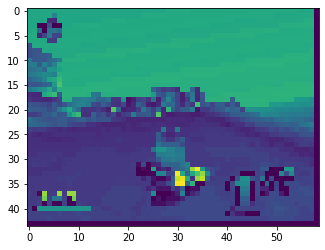

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(filteredimages[1000])
plt.show()

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = Frame_Color_Fix(filteredimages[1000])
plt.imshow(image)
plt.show()

TypeError: Invalid shape (1, 44, 59, 1) for image data

In [6]:
image

array([[[ 30],
        [ 20],
        [157],
        ...,
        [  9],
        [ 14],
        [  0]],

       [[ 22],
        [155],
        [155],
        ...,
        [ 14],
        [ 14],
        [  0]],

       [[ 22],
        [155],
        [155],
        ...,
        [ 14],
        [ 17],
        [  0]],

       ...,

       [[ 59],
        [ 59],
        [ 59],
        ...,
        [ 73],
        [ 73],
        [  0]],

       [[ 59],
        [ 59],
        [ 59],
        ...,
        [ 73],
        [ 73],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]]], dtype=uint8)

In [3]:
print(Game_Screen[2] - Game_Screen[0] , Game_Screen[3] - Game_Screen[1] )

590 440


In [2]:
Game_Screen

[20, 65, 610, 505]

In [14]:
LibrariesImported["numpy"].random.rand()

0.9068285656214217

In [ ]:
elevateddelta = 1 
                    Nonul = True
                    for stepframes in range(rewardstepdist):
                        delt = (data[GameName]["reward"][trainindex][frameindex + 1][0] - data[GameName]["reward"][trainindex][frameindex][0])
                        if(delt > 0.3):
                            elevateddelta = (( elevateddelta * (delt * delt  )))
                        else:
                            Nonul = False
                    #if(False):
                    if((elevateddelta >  (ReferenceDelta*rewardstepdist)) and (Nonul)):
                        print(elevateddelta, (ReferenceDelta*rewardstepdist) * 1.5)
                        if(actiontipe == "Serialized8"):
                            for stepframes in range(round(1)):
                                filteredlabels.append( XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex]))
                        if(actiontipe == "Serialized3"):
                            for stepframes in range(round(1)):
                                filteredlabels.append( XimputSerializerUint3(data[GameName]["action"][trainindex][frameindex]))
                        elif(actiontipe == "15array"):
                            for stepframes in range(round(1)):
                                filteredlabels.append(data[GameName]["action"][trainindex][frameindex])
                        if(observationdims == 0):
                            for stepframes in range(round(1)):
                                filteredimages.append(data[GameName]["observation"][trainindex][frameindex])
                        elif(observationdims == -1):
                            for stepframes in range(round(1)):
                                filteredimages.append( LibrariesImported["numpy"].expand_dims(data[GameName]["observation"][trainindex][frameindex - 3], axis=-1))